In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.data.data_class import BatteryData
from src.data.load_data import DataLoader
from src.data.wrangle_data import DataWrangler

#from rebuilding_features import load_batches_to_dict
from src.visualization.helpers import print_dict_keys

# change working directory to base, to make all imports and file paths work
import os
#os.chdir(os.pardir)
os.chdir(r"C:\Users\PC-1\Documents\GitHub\Projects\battery_island\src\data")
print("Current directory: %s" % os.getcwd())

Current directory: C:\Users\PC-1\Documents\GitHub\Projects\battery_island\src\data


# Usage of preprocessing

### Final Results dict structure
(same as original dataset, without the fluff)

#### Batch
- ["b1c1"]


    - ["cycle_life"]
    
    - ["summary"]
        - ["IR"]
        - ["QD"]
        - ["remaining_cycle_life"]
        - ["high_current_discharging_time"]
        
    - ["cycles"]
        - ["1"]
            -["Qd_resample"]
            -["T_resample"]
            -["V_resample"]
            
            Only if specified in preprocessing function with "return_original_data":
            -["Qd_original_data"]
            -["T_original_data"]
            -["V_original_data"]
            -["t_original_data"]
        
        - ["2"] ...
        - ["3"] ...
        
        
- ["b1c2"] ...

In [2]:
battery_data = BatteryData("long_live", None, None)
data_loader = DataLoader("long_live", battery_data)
data_wrangler = DataWrangler("long_live")

# Load data from either SQL or pickle batch files depending on model i.e. battery_island (see constructor
# arguments)
data_loader.read_data_from_source()  # For long live these are 3 pkl batch files in external dir.
                                     # Output is stored in processed.pkl in interim dir.

Loading batch1 ...
Loading batch2 ...
Loading batch3 ...
Done loading batches


In [3]:
#batch1 = load_batches_to_dict(amount_to_load=1)
results = data_loader.get_dictionary()
#processed_results = data_wrangler.clean_data(data_loader.get_dictionary())
#results = preprocess_batch(batch1, return_original_data=True, verbose=True)


In [4]:
print_dict_keys(results, max_depth=1)

[b1c0]
  [cycle_life]
  [charge_policy]
  [summary]
  [cycles]
[b1c1]
  [cycle_life]
  [charge_policy]
  [summary]
  [cycles]
[b1c2]
  [cycle_life]
  [charge_policy]
  [summary]
  [cycles]
[b1c3]
  [cycle_life]
  [charge_policy]
  [summary]
  [cycles]
[b1c4]
  [cycle_life]
  [charge_policy]
  [summary]
  [cycles]
[b1c5]
  [cycle_life]
  [charge_policy]
  [summary]
  [cycles]
[b1c6]
  [cycle_life]
  [charge_policy]
  [summary]
  [cycles]
[b1c7]
  [cycle_life]
  [charge_policy]
  [summary]
  [cycles]
[b1c9]
  [cycle_life]
  [charge_policy]
  [summary]
  [cycles]
[b1c11]
  [cycle_life]
  [charge_policy]
  [summary]
  [cycles]
[b1c14]
  [cycle_life]
  [charge_policy]
  [summary]
  [cycles]
[b1c15]
  [cycle_life]
  [charge_policy]
  [summary]
  [cycles]
[b1c16]
  [cycle_life]
  [charge_policy]
  [summary]
  [cycles]
[b1c17]
  [cycle_life]
  [charge_policy]
  [summary]
  [cycles]
[b1c18]
  [cycle_life]
  [charge_policy]
  [summary]
  [cycles]
[b1c19]
  [cycle_life]
  [charge_policy]
  [summa

In [5]:
#plot_preprocessing_results(results["b1c1"]["cycles"]["6"])

# Additional plots for better understanding

In [6]:
#print(results)

cell1 = results["b1c1"]
cycle = cell1["cycles"]["2"]

I = cycle["I"]
Qd = cycle["Qd"]
T = cycle["T"]
V = cycle["V"]
t = cycle["t"]
print(Qd)
print(Qd.size)

[0.        0.        0.        ... 1.0766124 1.0766124 1.0766124]
1119


Text(0.5, 1.0, 'V')

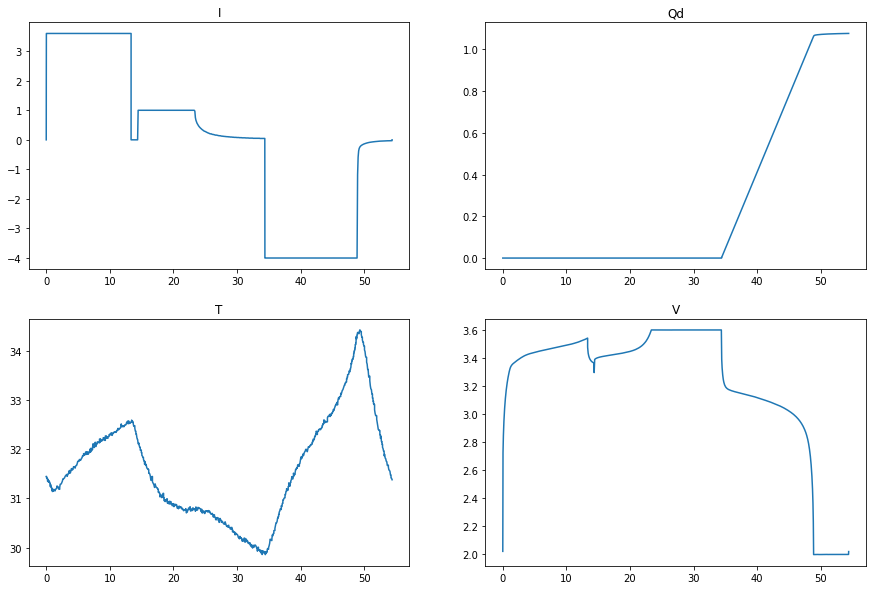

In [7]:
# Plots over time

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
ax[0][0].plot(t, I)
ax[0][0].set_title("I")

ax[0][1].plot(t, Qd)
ax[0][1].set_title("Qd")

ax[1][0].plot(t, T)
ax[1][0].set_title("T")

ax[1][1].plot(t, V)
ax[1][1].set_title("V")

Text(0.5, 1.0, 'V')

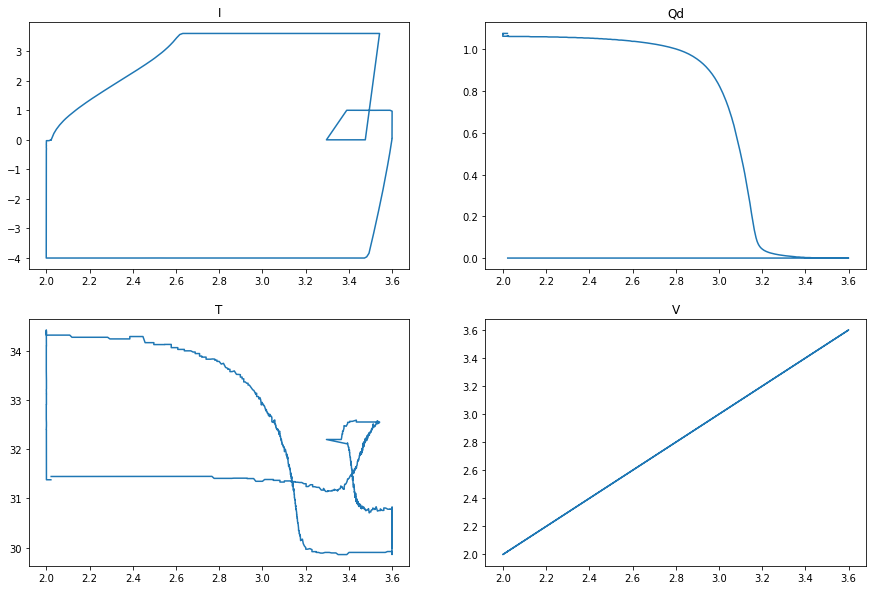

In [8]:
# Plots over Voltage

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
ax[0][0].plot(V, I)
ax[0][0].set_title("I")

ax[0][1].plot(V, Qd)
ax[0][1].set_title("Qd")

ax[1][0].plot(V, T)
ax[1][0].set_title("T")

ax[1][1].plot(V, V)
ax[1][1].set_title("V")

In [9]:
# # Comparing the effect of different conditions on Voltage span 

# cond1 = V < 3.5  # Cut off potential measurement inaccuracies because of the steep slope at the start of discharge.
# cond2 = V >= 2.0  # Only start after the first discharge capacity was detected.
# cond3 = I < -3.99 # Only consider measurements that were taken during high current discharging.

# """
# 2 options for the threshold of I:
# I < 0      --> discharging in general    --> resulting time span for b1c1: 20.00 minutes
# I < -3.99  --> high current discharging  --> resulting time span for b1c1: 14.49 minutes

# -3.99 was chosen under the assumption, that the highest signal for aging is in the high current region.
# The -3.99 threshold also cleans up the curves near the end of discharge (with almost constant voltage).

# Important Note: The time span of measurements during discharging gets cut signaficantly by this threshold,
#     while the main body of the curves Qd and T stays the same.
# """

# print("Without conditions: ", V.max(), V.min(), "time span: ", t.max()-t.min())
# print("cond1: ", V[cond1].max(), V[cond1].min(), "time span: ", t[cond1].max()-t[cond1].min())
# print("cond2: ", V[cond2].max(), V[cond2].min(), "time span: ", t[cond2].max()-t[cond2].min())
# print("cond3: ", V[cond3].max(), V[cond3].min(), "time span: ", t[cond3].max()-t[cond3].min())

# cond12 = cond1 & cond2
# cond13 = cond1 & cond3
# cond23 = cond2 & cond3
# print("cond1 & cond2: ", V[cond12].max(), V[cond12].min(), "time span: ", t[cond12].max()-t[cond12].min())
# print("cond1 & cond3: ", V[cond13].max(), V[cond13].min(), "time span: ", t[cond13].max()-t[cond13].min())
# print("cond2 & cond3: ", V[cond23].max(), V[cond23].min(), "time span: ", t[cond23].max()-t[cond23].min())

# cond123 = cond1 & cond2 & cond3
# print("cond1 & cond2 & cond3: ", V[cond123].max(), V[cond123].min(), "time span: ", t[cond123].max()-t[cond123].min())

Text(0.5, 1.0, 'T')

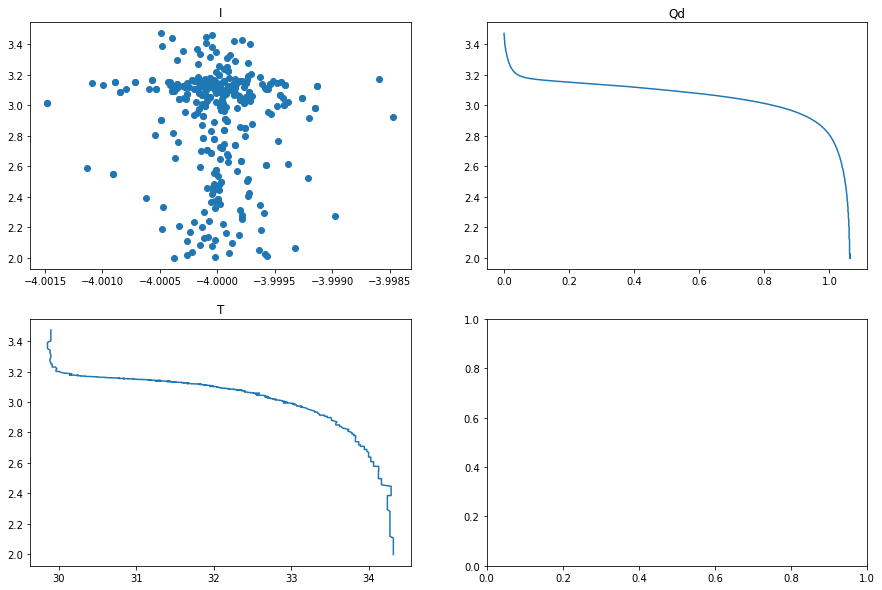

In [10]:
# Plot only the measurements during high current discharging
cond = I < -3.99

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
ax[0][0].scatter(I[cond], V[cond])
ax[0][0].set_title("I")

ax[0][1].plot(Qd[cond], V[cond])
ax[0][1].set_title("Qd")

ax[1][0].plot(T[cond], V[cond])
ax[1][0].set_title("T")

i: 100  size Qd: 338
i: 200  size Qd: 336
i: 300  size Qd: 334
i: 400  size Qd: 329
i: 500  size Qd: 333
i: 600  size Qd: 338
i: 700  size Qd: 327
i: 800  size Qd: 317
i: 900  size Qd: 340
i: 1000  size Qd: 317
i: 1100  size Qd: 334
i: 1200  size Qd: 330
i: 1300  size Qd: 329
i: 1400  size Qd: 323
i: 1500  size Qd: 321
i: 1600  size Qd: 319
i: 1700  size Qd: 319
i: 1800  size Qd: 321
i: 1900  size Qd: 301
i: 2000  size Qd: 313
i: 2100  size Qd: 304


[]

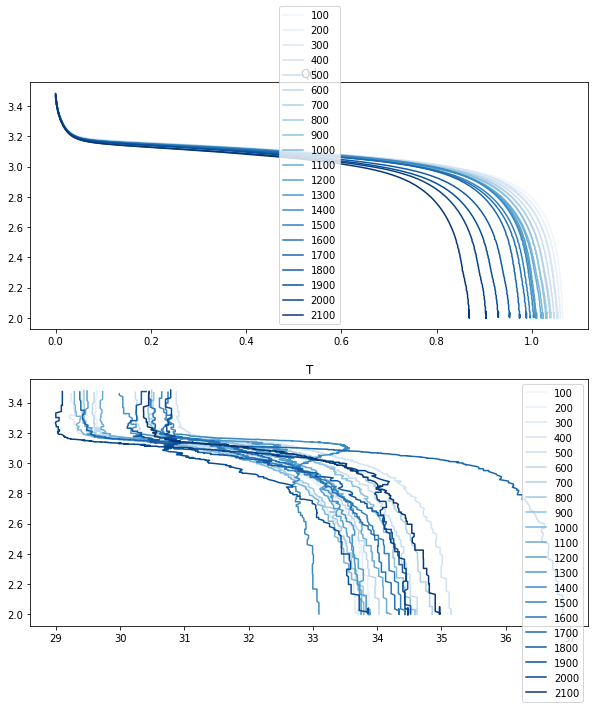

In [11]:
# Visualizing the effect of the I threshold on Qd and T

I_thresh = -3.99

fig, ax = plt.subplots(nrows=2, figsize=(10, 10))

for i, cycle in enumerate(cell1["cycles"].values()):
    if i == 0:
        continue
    if i % 100 == 0:
        mask = cycle["I"] < I_thresh
        print("i:", i, " size Qd:", cycle["Qd"][mask].size)
        
        ax[0].plot(cycle["Qd"][mask], cycle["V"][mask], label=i, color=plt.cm.Blues(i/len(cell1["cycles"])))
        ax[0].set_title("Qd")
        
        ax[1].plot(cycle["T"][mask], cycle["V"][mask], label=i, color=plt.cm.Blues(i/len(cell1["cycles"])))
        ax[1].set_title("T")

ax[0].legend()
ax[1].legend()
plt.plot()